In [1]:
# Example to Demonstrate the Union of Two Fuzzy Sets
A = dict()
B = dict()
Y = dict()

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}

print('The First Fuzzy Set is :', A)
print('The Second Fuzzy Set is :', B)


for A_key, B_key in zip(A, B):
	A_value = A[A_key]
	B_value = B[B_key]

	if A_value > B_value:
		Y[A_key] = A_value
	else:
		Y[B_key] = B_value

print('Fuzzy Set Union is :', Y)


The First Fuzzy Set is : {'a': 0.2, 'b': 0.3, 'c': 0.6, 'd': 0.6}
The Second Fuzzy Set is : {'a': 0.9, 'b': 0.9, 'c': 0.4, 'd': 0.5}
Fuzzy Set Union is : {'a': 0.9, 'b': 0.9, 'c': 0.6, 'd': 0.6}


In [2]:
# Example to Demonstrate Intersection of Two Fuzzy Sets
A = dict()
B = dict()
Y = dict()

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}

print('The First Fuzzy Set is :', A)
print('The Second Fuzzy Set is :', B)


for A_key, B_key in zip(A, B):
	A_value = A[A_key]
	B_value = B[B_key]

	if A_value < B_value:
		Y[A_key] = A_value
	else:
		Y[B_key] = B_value
print('Fuzzy Set Intersection is :', Y)


The First Fuzzy Set is : {'a': 0.2, 'b': 0.3, 'c': 0.6, 'd': 0.6}
The Second Fuzzy Set is : {'a': 0.9, 'b': 0.9, 'c': 0.4, 'd': 0.5}
Fuzzy Set Intersection is : {'a': 0.2, 'b': 0.3, 'c': 0.4, 'd': 0.5}


In [3]:
# Example to Demonstrate the Difference Between Two Fuzzy Sets
A = dict()
Y = dict()

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}

print('The Fuzzy Set is :', A)


for A_key in A:
  Y[A_key]= 1-A[A_key]

print('Fuzzy Set Complement is :', Y)


The Fuzzy Set is : {'a': 0.2, 'b': 0.3, 'c': 0.6, 'd': 0.6}
Fuzzy Set Complement is : {'a': 0.8, 'b': 0.7, 'c': 0.4, 'd': 0.4}


In [4]:
# Example to Demonstrate the Difference Between Two Fuzzy Sets
A = dict()
B = dict()
Y = dict()

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}

print('The First Fuzzy Set is :', A)
print('The Second Fuzzy Set is :', B)


for A_key, B_key in zip(A, B):
	A_value = A[A_key]
	B_value = B[B_key]
	B_value = 1 - B_value

	if A_value < B_value:
		Y[A_key] = A_value
	else:
		Y[B_key] = B_value

print('Fuzzy Set Difference is :', Y)


The First Fuzzy Set is : {'a': 0.2, 'b': 0.3, 'c': 0.6, 'd': 0.6}
The Second Fuzzy Set is : {'a': 0.9, 'b': 0.9, 'c': 0.4, 'd': 0.5}
Fuzzy Set Difference is : {'a': 0.09999999999999998, 'b': 0.09999999999999998, 'c': 0.6, 'd': 0.5}


Temperatura de entrada: 35°C
Nível de resfriamento recomendado: 65.48


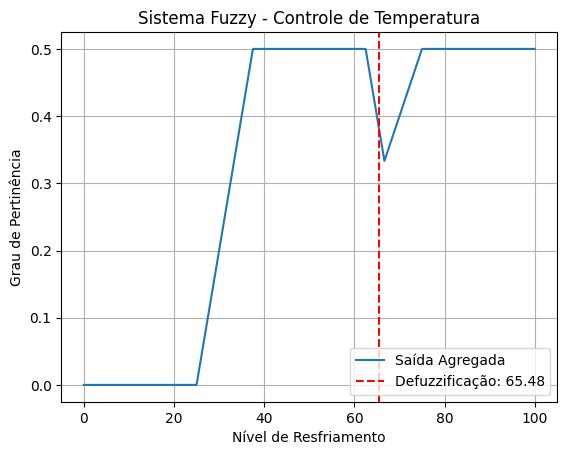

In [5]:
# @title Lógica Fuzzy com NumPy - Controle de Temperatura
import numpy as np
import matplotlib.pyplot as plt

# Fuzzificação - funções de pertinência
def temperatura_baixa(t):
    return np.clip((30 - t) / 10, 0, 1)

def temperatura_media(t):
    return np.clip((t - 20) / 10, 0, 1) * np.clip((40 - t) / 10, 0, 1)

def temperatura_alta(t):
    return np.clip((t - 30) / 10, 0, 1)

# Saída: resfriamento (nível de atuação do ar condicionado, por exemplo)
def resfriamento_fraco(x):
    return np.clip((50 - x) / 50, 0, 1)

def resfriamento_moderado(x):
    return np.clip((x - 25) / 25, 0, 1) * np.clip((75 - x) / 25, 0, 1)

def resfriamento_forte(x):
    return np.clip((x - 50) / 50, 0, 1)

# Motor de Inferência
def inferencia_fuzzy(temperatura):
    mu_baixa = temperatura_baixa(temperatura)
    mu_media = temperatura_media(temperatura)
    mu_alta = temperatura_alta(temperatura)

    # Regras Fuzzy
    # Se temperatura é baixa => resfriamento fraco
    # Se temperatura é média => resfriamento moderado
    # Se temperatura é alta  => resfriamento forte

    # Geração das funções de saída modificadas pelas pertinências
    x = np.linspace(0, 100, 1000)
    saida_fraco = np.minimum(resfriamento_fraco(x), mu_baixa)
    saida_moderado = np.minimum(resfriamento_moderado(x), mu_media)
    saida_forte = np.minimum(resfriamento_forte(x), mu_alta)

    # Agregação
    saida_agregada = np.maximum(np.maximum(saida_fraco, saida_moderado), saida_forte)

    # Defuzzificação - centro de gravidade
    valor_crisp = np.sum(x * saida_agregada) / np.sum(saida_agregada)

    return valor_crisp, x, saida_agregada

# Exemplo de uso
temperatura_entrada = 35
saida, x, y = inferencia_fuzzy(temperatura_entrada)

print(f"Temperatura de entrada: {temperatura_entrada}°C")
print(f"Nível de resfriamento recomendado: {saida:.2f}")

# Gráfico da saída fuzzy
plt.plot(x, y, label="Saída Agregada")
plt.axvline(saida, color='r', linestyle='--', label=f"Defuzzificação: {saida:.2f}")
plt.title("Sistema Fuzzy - Controle de Temperatura")
plt.xlabel("Nível de Resfriamento")
plt.ylabel("Grau de Pertinência")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
!pip install scikit-fuzzy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 17.1 MB/s eta 0:00:00


# Descrição:

- Gera dados sintéticos simulando um ambiente real.

- Normaliza os dados.

- Cria um sistema fuzzy com duas entradas (temperatura e umidade).

- Define regras fuzzy com base em conhecimento intuitivo.

- Estima o conforto térmico com base nos valores de entrada.

- Mostra as curvas de pertinência e o resultado da defuzzificação.

Nível de conforto estimado: 8.14


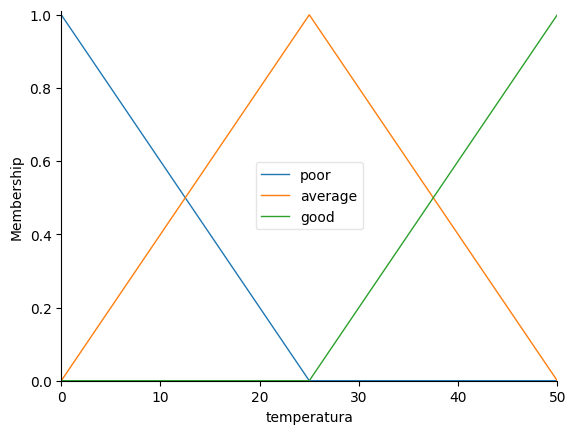

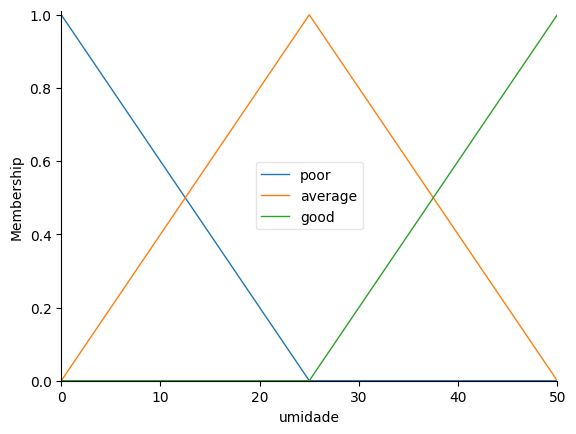

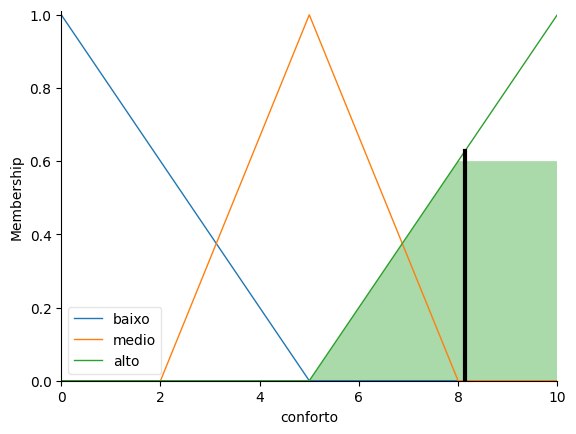

In [9]:
# @title Sistema Fuzzy com ajuste de dados (skfuzzy + sklearn)
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Gerar dados sintéticos: temperatura, umidade => conforto
X, y = make_regression(n_samples=300, n_features=2, noise=0.2)
scaler_X = MinMaxScaler(feature_range=(0, 50))
scaler_y = MinMaxScaler(feature_range=(0, 10))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Definir variáveis fuzzy
temperatura = ctrl.Antecedent(np.arange(0, 51, 1), 'temperatura')
umidade = ctrl.Antecedent(np.arange(0, 51, 1), 'umidade')
conforto = ctrl.Consequent(np.arange(0, 11, 1), 'conforto')

# Criar automaticamente funções de pertinência com aprendizado
temperatura.automf(3)  # ['poor', 'average', 'good']
umidade.automf(3)
conforto['baixo'] = fuzz.trimf(conforto.universe, [0, 0, 5])
conforto['medio'] = fuzz.trimf(conforto.universe, [2, 5, 8])
conforto['alto'] = fuzz.trimf(conforto.universe, [5, 10, 10])

# Definir regras fuzzy com base no bom senso
regras = [
    ctrl.Rule(temperatura['poor'] & umidade['poor'], conforto['medio']),
    ctrl.Rule(temperatura['average'] & umidade['average'], conforto['alto']),
    ctrl.Rule(temperatura['good'] & umidade['good'], conforto['baixo']),
    ctrl.Rule(temperatura['poor'] & umidade['good'], conforto['baixo']),
    ctrl.Rule(temperatura['good'] & umidade['poor'], conforto['alto']),
]

# Construir sistema fuzzy
sistema_conforto = ctrl.ControlSystem(regras)
simulador = ctrl.ControlSystemSimulation(sistema_conforto)

# Simular um exemplo
simulador.input['temperatura'] = 35
simulador.input['umidade'] = 25
simulador.compute()

print(f"Nível de conforto estimado: {simulador.output['conforto']:.2f}")

# Plotar as superfícies fuzzy
temperatura.view()
umidade.view()
conforto.view(sim=simulador)



### 🔸 1. **Fuzzificador Singleton**

#### ✅ O que é:
- Uma função de pertinência que assume **valor 1 em apenas um ponto específico**, e **zero em todos os outros**.
- Visualmente, parece uma “agulha” no gráfico — um valor “absoluto”.

#### 🧠 Quando usar:
- Quando você **tem certeza absoluta** sobre o valor de entrada.
- Ideal para sistemas em que **a entrada é sempre exata e constante** (ex: sensores digitais com valor fixo).
- **Computacionalmente muito leve**, pois simplifica os cálculos fuzzy.

#### 🔧 Exemplo:
```text
Se a temperatura é exatamente 25°C, então...
```

---

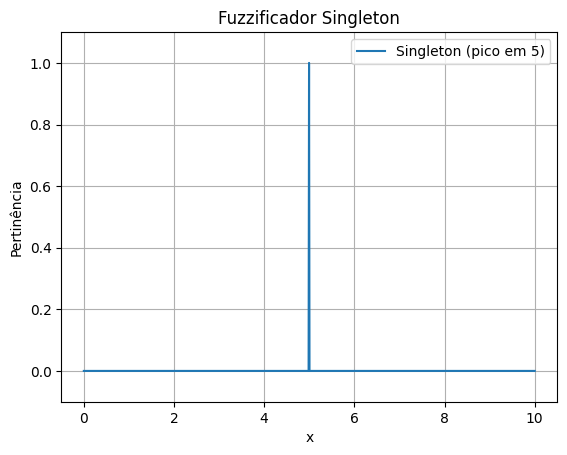

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 1000)
singleton = np.zeros_like(x)
singleton[np.abs(x - 5).argmin()] = 1  # pico em x=5

plt.plot(x, singleton, label='Singleton (pico em 5)')
plt.title("Fuzzificador Singleton")
plt.xlabel("x")
plt.ylabel("Pertinência")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.show()




### 🔸 2. **Fuzzificador Gaussiano**

#### ✅ O que é:
- Uma função de pertinência com **formato de sino** (curva normal), baseada na distribuição gaussiana.
- Definida pelo centro (`c`) e pelo desvio padrão (`σ`, que controla a “largura” da curva).

#### 🧠 Quando usar:
- Quando os dados variam **suavemente** e têm **distribuição contínua e natural**.
- Útil quando há **incerteza gradual** ou medições ruidosas (ex: temperatura ambiente).
- Muito usado em **controle adaptativo** e quando você quer uma transição suave entre as regras.

#### 🔧 Exemplo:
```text
Pertinência máxima no centro (ex: 25°C), mas ainda aceitamos valores próximos (ex: 24.5°C ou 25.7°C) com peso reduzido.
```

---

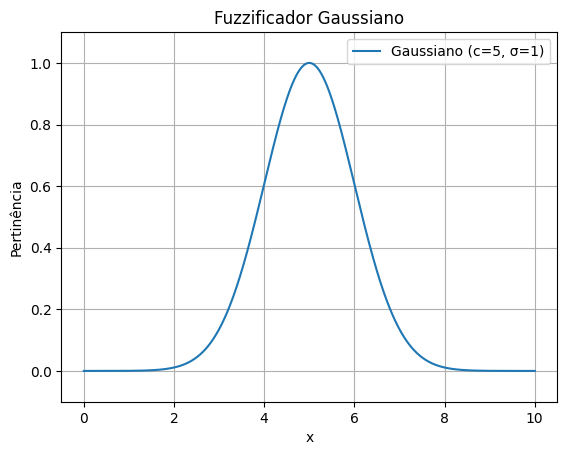

In [11]:
def gaussian(x, c, sigma):
    return np.exp(-((x - c)**2) / (2 * sigma**2))

x = np.linspace(0, 10, 1000)
gauss = gaussian(x, c=5, sigma=1)

plt.plot(x, gauss, label='Gaussiano (c=5, σ=1)')
plt.title("Fuzzificador Gaussiano")
plt.xlabel("x")
plt.ylabel("Pertinência")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.show()




### 🔸 3. **Fuzzificador Triangular**

#### ✅ O que é:
- Uma função com **forma de triângulo**: sobe linearmente de 0 até 1, depois desce de 1 até 0.
- Definida por três pontos: início (`a`), pico (`b`), fim (`c`).

#### 🧠 Quando usar:
- Quando você quer uma **representação simples** e eficiente de uma região fuzzy.
- Muito comum em sistemas de controle fuzzy **manuais**, pela facilidade de entendimento.
- Útil quando você precisa de transições lineares e rápidas.

#### 🔧 Exemplo:
```text
“Temperatura média” pode ser representada com pico em 25°C, começando a crescer a partir de 20°C e caindo até 30°C.
```

---

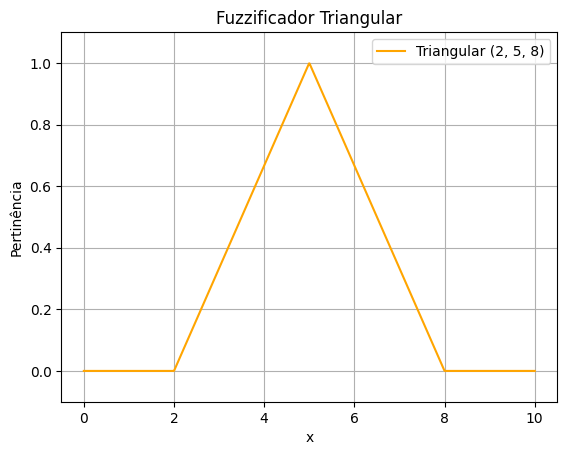

In [12]:
def triangular(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

x = np.linspace(0, 10, 1000)
tri = triangular(x, 2, 5, 8)

plt.plot(x, tri, label='Triangular (2, 5, 8)', color='orange')
plt.title("Fuzzificador Triangular")
plt.xlabel("x")
plt.ylabel("Pertinência")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.show()




### 🔸 4. **Fuzzificador Trapezoidal**

#### ✅ O que é:
- Parecido com o triangular, mas com um “topo plano”.
- Tem **dois pontos de subida**, **uma região de valor 1 constante**, e **dois pontos de descida**.
- Definido por quatro pontos: início (`a`), começo do topo (`b`), fim do topo (`c`), fim total (`d`).

#### 🧠 Quando usar:
- Quando você quer representar que **uma faixa de valores é igualmente boa** (100% de pertinência).
- Mais robusto que o triangular para representar **regiões amplas com certeza total**.

#### 🔧 Exemplo:
```text
“Temperatura confortável” pode ser 100% verdadeira entre 23°C e 27°C, mas vai decrescendo fora disso.
```

---

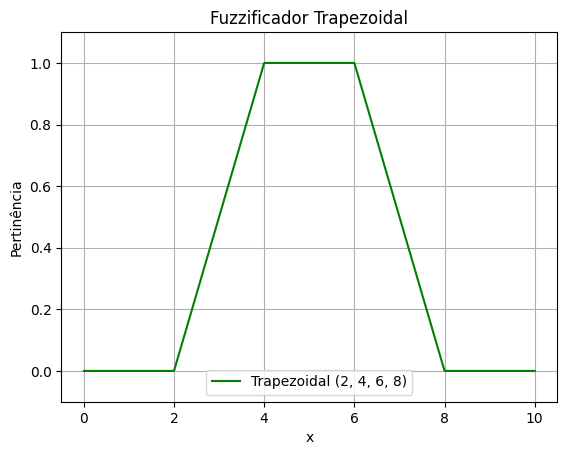

In [14]:
def trapezoidal(x, a, b, c, d):
    return np.maximum(np.minimum(np.minimum((x - a)/(b - a), 1), (d - x)/(d - c)), 0)

x = np.linspace(0, 10, 1000)
trap = trapezoidal(x, 2, 4, 6, 8)

plt.plot(x, trap, label='Trapezoidal (2, 4, 6, 8)', color='green')
plt.title("Fuzzificador Trapezoidal")
plt.xlabel("x")
plt.ylabel("Pertinência")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.show()




### ✅ Comparando rapidamente:

| Tipo       | Forma          | Quando usar                                        | Simples? |
|------------|----------------|----------------------------------------------------|----------|
| Singleton  | Ponto único    | Entrada exata, alta certeza                        | ✅        |
| Gaussiano  | Curva suave    | Incerteza gradual, transição natural               | ❌        |
| Triangular | Pico linear    | Representação simples, transições rápidas          | ✅✅       |
| Trapezoidal| Topo plano     | Faixa de certeza total, mais realista em domínios | ✅✅       |

---



## ⚙️ **Desafio 1 — Sistema Fuzzy para Controle de Vibração em Equipamentos Industriais**

### 🎯 Desafio:
Desenvolver um sistema fuzzy que monitore e controle o nível de vibração em equipamentos industriais (como motores, bombas ou compressores), com o objetivo de **prever falhas** ou **ajustar parâmetros operacionais automaticamente**.

### 📥 Entradas sugeridas:
- **Amplitude de vibração** (em mm/s)
- **Temperatura do motor**
- **Tempo de operação contínua (em horas)**

### 📤 Saída esperada:
- **Nível de risco de falha** (0 a 10)
- *(Opcional)* Sugestão de ação: "parar equipamento", "reduzir carga", "acionar manutenção preditiva"

---

### 🔍 Objetivos:
- Definir conjuntos fuzzy coerentes com o domínio industrial (ex: “vibração leve”, “vibração severa”).
- Explorar uso de **fuzzificadores do tipo trapezoidal** para tempo de operação (representando "zona segura" e "zona crítica").
- Testar diferentes combinações de regras fuzzy baseadas em experiência ou tabelas técnicas de manutenção.
- Escolher e justificar o método de **defuzzificação**.
- Simular cenários como:
  - Equipamento novo em alta temperatura
  - Equipamento antigo com vibração média
  - Operação prolongada com vibração crescente

---

### ⚒️ Habilidades desenvolvidas:
- Modelagem fuzzy em contexto real de manutenção industrial.
- Raciocínio baseado em falhas e confiabilidade.
- Justificativa técnica das decisões de modelagem.

---



# Desafio: 2 — Sistema de Direção Autônoma para Curvas
🎯 Modelar um sistema fuzzy que defina a velocidade ideal em curvas, baseado em:

Ângulo da curva

Condição da pista (seca, molhada, com areia)

Velocidade atual do veículo

🔍 Objetivos:
Criar variáveis fuzzy realistas para cada entrada.

Explorar funções de pertinência irregulares (ex: fuzzy assimétrico para curvas).

Discutir a viabilidade de usar um fuzzificador singleton para condição da pista.

Explicar como a modelagem ajuda a evitar acidentes ou instabilidade.

Apresentar gráficos com simulações para diferentes entradas.

#🌿 Exercício 3 — Irrigação Inteligente em Agricultura de Precisão
🎯 Desafio:
Projetar um sistema fuzzy que defina quanto irrigar uma plantação, baseado em:

Umidade do solo

Previsão de chuva

Estágio de crescimento da planta

🔍 Objetivos:
Definir as variáveis e conjuntos fuzzy.

Justificar o uso de fuzzificadores com topo plano (trapezoidal) para a fase de crescimento.

Simular e analisar como o sistema se adapta a:

Solo seco com previsão de chuva.

Solo úmido em fase de floração.

Comparar o sistema fuzzy com um sistema baseado em limiares fixos (thresholding).

# Desafio Resolvido como exemplo

## 🔧 Exercício 1 — Sistema de Ar Condicionado Inteligente
🎯 Desafio:
Criar um sistema fuzzy para controlar a potência do ar condicionado de um ambiente com base em:

Temperatura

Umidade

Número de pessoas no ambiente

🔍 Objetivos:
Modelar as variáveis linguísticas e os conjuntos fuzzy para cada entrada.

Justificar a escolha dos fuzzificadores (gaussiano, triangular, trapezoidal...).

Definir as regras fuzzy.

Escolher a estratégia de defuzzificação mais adequada.

Mostrar em gráficos a saída para diferentes situações (ex: sala vazia e quente vs sala cheia e fria).

Cenário 1 - Entrada: {'temperatura': 30, 'umidade': 35, 'pessoas': 15}
Potência do ar condicionado: 8.40



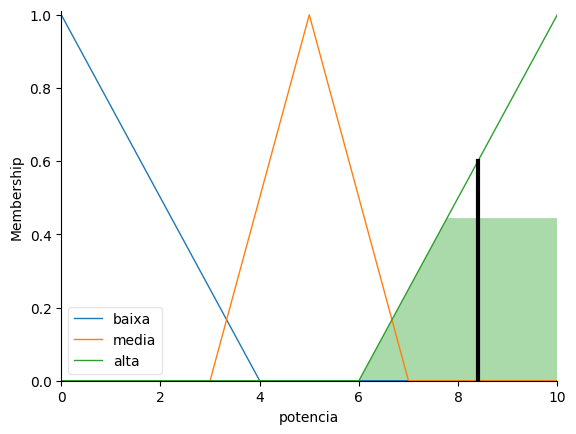

Cenário 2 - Entrada: {'temperatura': 22, 'umidade': 50, 'pessoas': 5}
Potência do ar condicionado: 3.60



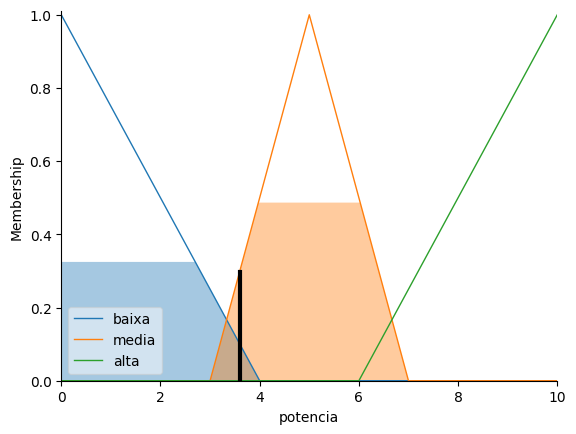

Cenário 3 - Entrada: {'temperatura': 28, 'umidade': 70, 'pessoas': 3}
Potência do ar condicionado: 2.70



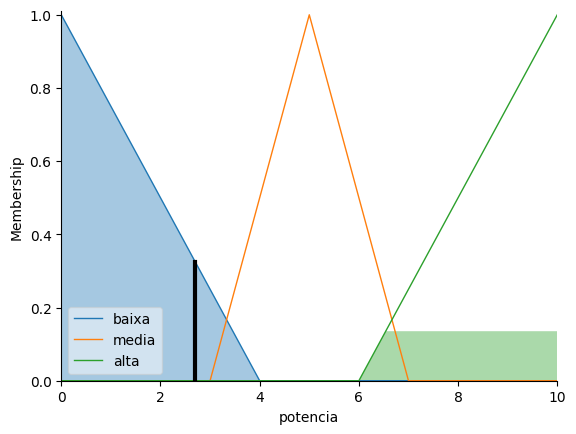

In [16]:
# Sistema Fuzzy para Controle de Ar Condicionado Inteligente

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Definir variáveis fuzzy

# Universo das variáveis
x_temp = np.arange(16, 36, 1)         # Temperatura (°C)
x_umidade = np.arange(20, 81, 1)      # Umidade (%RH)
x_pessoas = np.arange(0, 21, 1)       # Número de pessoas
x_potencia = np.arange(0, 11, 1)      # Potência do ar condicionado (0 a 10)

# Entradas
temperatura = ctrl.Antecedent(x_temp, 'temperatura')
umidade = ctrl.Antecedent(x_umidade, 'umidade')
pessoas = ctrl.Antecedent(x_pessoas, 'pessoas')

# Saída
potencia = ctrl.Consequent(x_potencia, 'potencia')

# 2. Conjuntos fuzzy e justificativa:
# - Temperatura: triangular (variação linear, resposta sensível)
# - Umidade: trapezoidal (faixas bem definidas de conforto)
# - Pessoas: gaussiano (variação natural de ocupação)

# Temperatura (°C)
temperatura['fria'] = fuzz.trimf(x_temp, [16, 16, 22])
temperatura['confortavel'] = fuzz.trimf(x_temp, [20, 24, 28])
temperatura['quente'] = fuzz.trimf(x_temp, [26, 35, 35])

# Umidade (%RH)
umidade['seca'] = fuzz.trapmf(x_umidade, [20, 20, 30, 45])
umidade['ideal'] = fuzz.trapmf(x_umidade, [40, 45, 55, 60])
umidade['umida'] = fuzz.trapmf(x_umidade, [55, 70, 80, 80])

# Pessoas (número)
pessoas['poucas'] = fuzz.gaussmf(x_pessoas, 2, 2)
pessoas['media'] = fuzz.gaussmf(x_pessoas, 8, 2.5)
pessoas['cheia'] = fuzz.gaussmf(x_pessoas, 15, 2.5)

# Potência de saída
potencia['baixa'] = fuzz.trimf(x_potencia, [0, 0, 4])
potencia['media'] = fuzz.trimf(x_potencia, [3, 5, 7])
potencia['alta'] = fuzz.trimf(x_potencia, [6, 10, 10])

# 3. Definir regras fuzzy
regras = [
    ctrl.Rule(temperatura['quente'] & umidade['seca'] & pessoas['cheia'], potencia['alta']),
    ctrl.Rule(temperatura['quente'] & umidade['ideal'], potencia['media']),
    ctrl.Rule(temperatura['confortavel'] & pessoas['media'], potencia['media']),
    ctrl.Rule(temperatura['fria'] | umidade['umida'], potencia['baixa']),
    ctrl.Rule(pessoas['poucas'] & temperatura['confortavel'], potencia['baixa']),
    ctrl.Rule(temperatura['quente'] & pessoas['media'], potencia['alta']),
]

# 4. Construir o sistema fuzzy
sistema = ctrl.ControlSystem(regras)
simulador = ctrl.ControlSystemSimulation(sistema)

# 5. Simular alguns casos
cenarios = [
    {"temperatura": 30, "umidade": 35, "pessoas": 15},  # quente e cheio
    {"temperatura": 22, "umidade": 50, "pessoas": 5},   # confortável e média ocupação
    {"temperatura": 28, "umidade": 70, "pessoas": 3},   # quente mas úmido
]

for i, entrada in enumerate(cenarios):
    simulador.input['temperatura'] = entrada['temperatura']
    simulador.input['umidade'] = entrada['umidade']
    simulador.input['pessoas'] = entrada['pessoas']
    simulador.compute()

    print(f"Cenário {i+1} - Entrada: {entrada}")
    print(f"Potência do ar condicionado: {simulador.output['potencia']:.2f}\n")

    potencia.view(sim=simulador)
    plt.show()